In [1]:
from flexpart_management.notebooks.sulfate_volcano_chc.n02_regressors.n02_regressors_lfc import *

Loading BokehJS ...

reload


In [106]:
from flexpart_management.notebooks.sulfate_volcano_chc.n02_regressors.n02_regressors_lfc_1 import \
    get_source_fit
from sklearn.preprocessing import QuantileTransformer as QT

In [ ]:
def main():
    

In [58]:
    # %%
    clus_cols, ts_merged = import_merged_data()
    ts_merged['n_Nitrate'] = QT().fit_transform(ts_merged[['Nitrate']])
    
    ts_merged['sqr_Nitrate'] = np.sqrt(ts_merged['Nitrate'])

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
ts_merged['sqr_Nitrate']

releases
2018-03-01 17:00:00         NaN
2018-03-01 18:00:00    0.021593
2018-03-01 19:00:00    0.041662
2018-03-01 20:00:00    0.094987
2018-03-01 21:00:00    0.077614
                         ...   
2018-05-31 19:00:00    0.096278
2018-05-31 20:00:00    0.056856
2018-05-31 21:00:00    0.079253
2018-05-31 22:00:00    0.051509
2018-05-31 23:00:00         NaN
Name: sqr_Nitrate, Length: 2020, dtype: float64

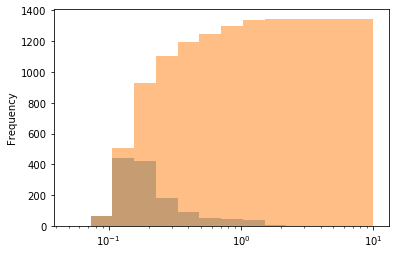

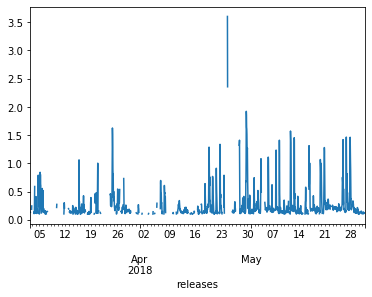

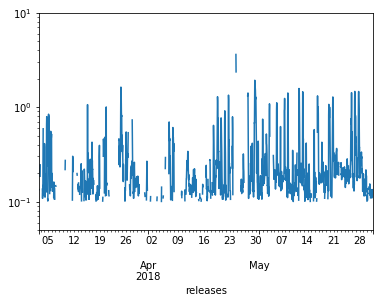

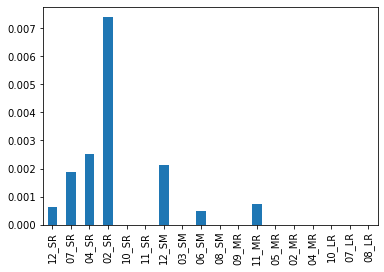

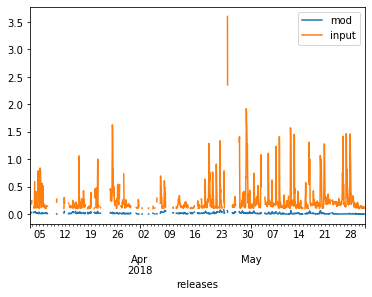

In [70]:

    # %%
    sulf = 'sqr_Nitrate'
    fp = dict(
        l1_ratio=[.001],
        n_alphas=100,
        max_iter=1e5
    )
    df = ts_merged[ ts_merged['sqr_Nitrate']>.1 ] 
    reg, X_in, y_in = get_source_fit(clus_cols, sulf, 
                   df, 
                   fit_par=fp, 
                   log_thr_min=0.05
                  )

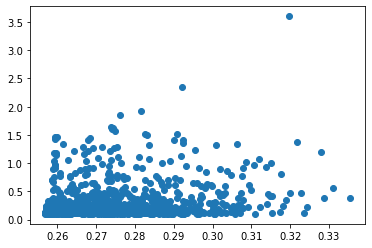

In [71]:
plt.plot(reg.predict(X_in),y_in,linewidth=0,marker='o')

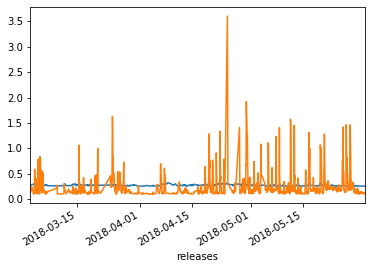

In [72]:
pred = pd.Series(reg.predict(X_in),index=X_in.index)
pred.plot()
y_in.plot()
# plt.gca().set_yscale('log')

In [29]:
reg.score(X_in,y_in)

0.2060623722422685

In [ ]:
    # %%
    sulf = 'Nitrate'
    fp = dict(
        l1_ratio=[.001],
         n_alphas=100)
    mod,_s = get_source_fit(clus_cols, sulf, ts_merged,
                   fit_par=fp,
                   log=True,
                   log_thr_min=.0001

                   )

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


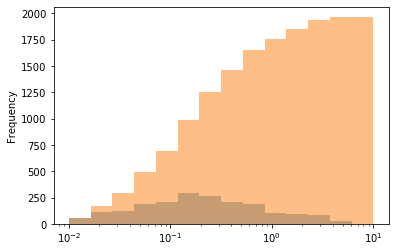

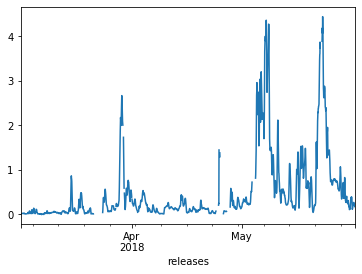

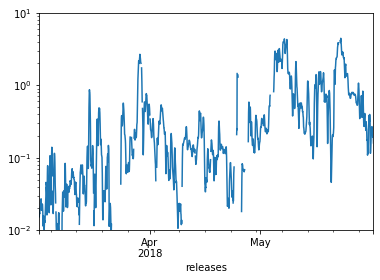

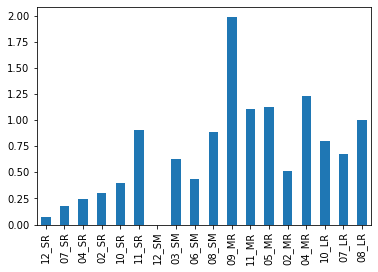

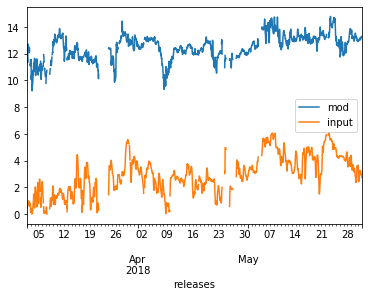

In [105]:
    # %%
    sulf = 'Sulfate'
    fp = dict(
        l1_ratio=[1],
         n_alphas=100,
        max_iter = 1e5
    )
    pd.Series.rolling
    df = ts_merged[ts_merged[sulf]>0]
    df[sulf] = df[sulf].rolling(
        window=5,min_periods=5,win_type='gaussian'
    ).mean(std=5)
    reg, X_in, y_in = get_source_fit(clus_cols, sulf, df,
                   fit_par=fp,
                   log=True,
                   log_thr_min=.01
                   )

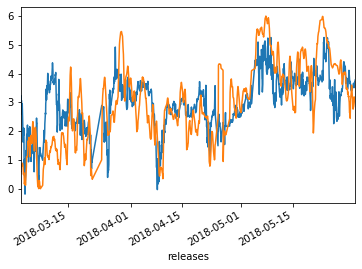

In [103]:
pred = pd.Series(reg.predict(X_in),index=X_in.index)
pred.plot()
y_in.plot()
# plt.gca().set_yscale('log')